In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [230]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/PatternAssignment5/'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [231]:
df = pd.read_csv('/content/gdrive/My Drive/PatternAssignment5/data_k_mean.txt',sep=" ",header=None)

In [232]:
K = input("Enter number of clusters: ")

Enter number of clusters: 5


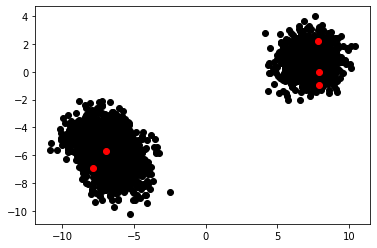

In [238]:
K = int(K)
# Select random observation as centroids
Centroids = (df.sample(n=K))
plt.scatter(df[0],df[1],c='black')
plt.scatter(Centroids[0],Centroids[1],c='red')
plt.show()

In [239]:
print(df)

            0        1
0    -7.87157 -4.86573
1    -4.76661 -6.87944
2    -6.67986 -5.83080
3    -8.93021 -4.15571
4    -7.91375 -4.22840
...       ...      ...
2995 -8.06037 -4.84080
2996  7.47328  0.37321
2997  6.91832 -0.32132
2998 -8.23828 -4.00405
2999 -5.75112 -5.99531

[3000 rows x 2 columns]


In [240]:
df = df.to_numpy();

In [241]:
centroids = df[np.random.choice(df.shape[0],K), :]
minm = np.zeros(K)

In [242]:
centroids

array([[-7.87157, -4.86573],
       [-9.20211, -5.7826 ],
       [ 8.97328, -0.98285],
       [-6.6515 , -6.5701 ],
       [-5.39424, -3.62256]])

In [243]:
print(df)

[[-7.87157 -4.86573]
 [-4.76661 -6.87944]
 [-6.67986 -5.8308 ]
 ...
 [ 6.91832 -0.32132]
 [-8.23828 -4.00405]
 [-5.75112 -5.99531]]


In [244]:
value = [ [ i[0] , i[1] , 5000 ] for i in df]

In [245]:
print(value)

[[-7.871569999999999, -4.86573, 5000], [-4.76661, -6.87944, 5000], [-6.679860000000001, -5.8308, 5000], [-8.93021, -4.15571, 5000], [-7.91375, -4.2284, 5000], [5.8628800000000005, 0.9979, 5000], [-7.6157, -6.0056199999999995, 5000], [8.07681, 0.16283, 5000], [5.76394, -0.4406, 5000], [-5.0452699999999995, -6.04326, 5000], [-5.9452300000000005, -7.277189999999999, 5000], [7.682289999999999, 1.8732099999999998, 5000], [-7.164510000000001, -4.5570699999999995, 5000], [-5.52871, -6.98528, 5000], [-5.1576699999999995, -4.79025, 5000], [-6.580769999999999, -6.980980000000001, 5000], [6.9194, 1.8640700000000001, 5000], [-6.638330000000001, -5.2240400000000005, 5000], [7.84315, 0.71741, 5000], [-8.62059, -4.52196, 5000], [7.7138100000000005, 0.67403, 5000], [7.55081, -0.13926, 5000], [-6.12205, -6.32135, 5000], [-8.524189999999999, -3.8065, 5000], [-6.611739999999999, -7.29484, 5000], [5.96309, 1.11874, 5000], [-5.489, -5.65873, 5000], [-7.88635, -6.18173, 5000], [-6.94976, -3.6736800000000005

In [246]:
for z in range(300):

    cnt = 0
    for i in range(len(value)):

        for j in range(K):
            minm[j] = np.sqrt( ((value[i][0] - centroids[j][0])**2) + ((value[i][1] - centroids[j][1])**2) )
        
        ## Return the minimum of an array 
        temp1 = np.where(minm == np.amin(minm))
        #print("Temp1 : ", temp1,"\n")
        temp1 = np.array(temp1)

        if(value[i][2] != temp1.item(0)):
            value[i][2] = temp1.item(0)
            #print("Points : ",value,"\n")
            cnt = cnt + 1

    if(cnt == 0):
        break
    for i in range(K):
        temp = [[x[0],x[1]] for x in points if x[2]==i]
        temp = np.array(temp)
        centroids[i] = [ sum(x)/len(x) for x in zip(*temp)]

In [247]:
print(value)

[[-7.871569999999999, -4.86573, 1], [-4.76661, -6.87944, 0], [-6.679860000000001, -5.8308, 4], [-8.93021, -4.15571, 1], [-7.91375, -4.2284, 1], [5.8628800000000005, 0.9979, 2], [-7.6157, -6.0056199999999995, 1], [8.07681, 0.16283, 3], [5.76394, -0.4406, 2], [-5.0452699999999995, -6.04326, 0], [-5.9452300000000005, -7.277189999999999, 0], [7.682289999999999, 1.8732099999999998, 3], [-7.164510000000001, -4.5570699999999995, 4], [-5.52871, -6.98528, 0], [-5.1576699999999995, -4.79025, 4], [-6.580769999999999, -6.980980000000001, 0], [6.9194, 1.8640700000000001, 2], [-6.638330000000001, -5.2240400000000005, 4], [7.84315, 0.71741, 3], [-8.62059, -4.52196, 1], [7.7138100000000005, 0.67403, 3], [7.55081, -0.13926, 3], [-6.12205, -6.32135, 0], [-8.524189999999999, -3.8065, 1], [-6.611739999999999, -7.29484, 0], [5.96309, 1.11874, 2], [-5.489, -5.65873, 0], [-7.88635, -6.18173, 1], [-6.94976, -3.6736800000000005, 4], [-8.632539999999999, -6.5259, 1], [-5.89133, -7.04173, 0], [-5.55773, -4.0356,

In [248]:
centroids = pd.DataFrame(centroids)

In [249]:
centroids

,0,1
0,-6.043401,-6.903258
1,-8.165394,-5.010152
2,6.446755,0.628230
3,8.074523,0.952916
4,-6.519707,-4.655454


<Figure size 1440x2160 with 0 Axes>

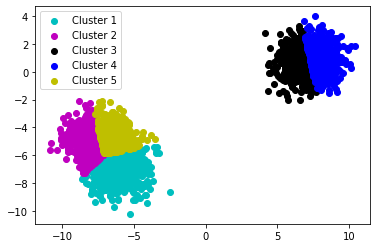

In [251]:
plt.figure(figsize = (20, 30))

color = ['c','m','k','b','y','g','r']
marker = ['o','o','o','o','o','o','o','o']

a,b = plt.subplots()

for i in range(K):
    temp=[[j[0],j[1]] for j in value if j[2]==i]
    temp=np.array(temp)
    lvl ="Cluster " + str(i+1)
    b.scatter(temp[:,0], temp[:,1], marker = marker[i], color = color[i], label = lvl)

legend = b.legend()

plt.show()
